#### OpenCV image segmentation task using the  images of nuclei in cells.

In [1]:
import cv2
import os
from PIL import Image

img = cv2.imread("6M_AL_Female/AMC-136--050-macurato.tif")
cv2.imwrite("AMC-136--050-macurato.png", img)

#Converting training set to .png format
path = 'Train/'
i = 0
for filename in os.listdir(path):
    os.rename(os.path.join(path,filename), os.path.join(path,'captured'+str(i)+'.png'))
    i = i +1

#Converting test set to .png format
path = 'Test/'
i = 95
for filename in os.listdir(path):
    os.rename(os.path.join(path,filename), os.path.join(path,'captured'+str(i)+'.png'))
    i = i +1


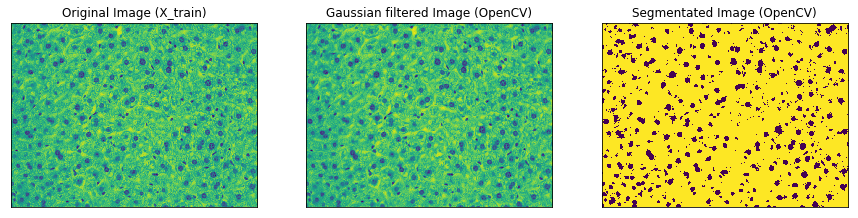

In [3]:
#Segmenting nuclei on one slide
import matplotlib.pyplot as plt
def openCVdemo():
    ID = '0a7d30b252359a10fd298b638b90cb9ada3acced4e0c0e5a3692013f432ee4e9'
    FILE = "AMC-136--050-macurato.png".format(ID,ID)
    img = cv2.imread(FILE,0)
    # Otsu's thresholding after Gaussian filtering
    blur = cv2.GaussianBlur(img,(5,5),0)
    ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)   
    # Plot Here
    plt.figure(figsize=(15,5))
    images = [blur, 0, th3]
    cv2.imwrite('SEGMENTED_NUCLEI.png', th3)
    cv2.imwrite('SEGMENTED_NUCLEI.tif', th3)
    titles = ['Original Image (X_train)','Gaussian filtered Image (OpenCV)',"Segmentated Image (OpenCV)"]
    plt.subplot(1,3,1),plt.imshow(img)
    plt.title(titles[0]), plt.xticks([]), plt.yticks([])
    plt.subplot(1,3,2),plt.imshow(images[0])
    plt.title(titles[1]), plt.xticks([]), plt.yticks([])
    plt.subplot(1,3,3),plt.imshow(images[2])
    plt.title(titles[2]), plt.xticks([]), plt.yticks([])
openCVdemo()

In [34]:


from skimage.measure import regionprops
import numpy as np
from skimage import measure
import cv2

### WRITE CODE IN HERE. You can have up to 2 cells for this question, but only one is required #######
segmented_nuceli = cv2.imread('SEGMENTED_NUCLEI.PNG')
labels = measure.label(segmented_nuceli)

#stats1 = measure.regionprops(labels1)
stats1 = measure.regionprops(segmented_nuceli)

for prop in stats1:
    print('Label: {} >>  : Object size: {}'.format(prop.label, prop.area))
    print('Label: {} >>  : Convex area: {}'.format(prop.label, prop.convex_area))
    print('Label: {} >>  : Euler Number: {}'.format(prop.label, prop.euler_number))
    print('Label: {} >>  : Inertia tensor eigen values: {}'.format(prop.label, prop.inertia_tensor_eigvals))
    print('Label: {} >>  : Solidity: {}'.format(prop.label, prop.solidity))
    print('Label: {} >>  : centroid: {}'.format(prop.label, prop.centroid))
    print('Label: {} >>  : diameter: {}'.format(prop.label, prop.equivalent_diameter))
    print('Label: {} >>  : major axis length: {}'.format(prop.label, prop.major_axis_length))

Label: 255 >> MALIGNANT : Object size: 3795237
Label: 255 >> MALIGNANT : Convex area: 4330263
Label: 255 >> MALIGNANT : Euler Number: 1
Label: 255 >> MALIGNANT : Inertia tensor eigen values: [248354.12658222683, 158677.6502685817, 89677.80964697845]
Label: 255 >> MALIGNANT : Solidity: 0.8764449180107536
Label: 255 >> MALIGNANT : centroid: (518.4278871121883, 696.1658236363105, 1.0)
Label: 255 >> MALIGNANT : diameter: 193.52931511122904
Label: 255 >> MALIGNANT : major axis length: 1993.4056349161926
